# PROBLEM STATEMENT



*  To perform a comprehensive data analysis and develop a deep learning-based classification report on the given traffic sign dataset.

* The objective is to build, train, and evaluate a Convolutional Neural Network (CNN) model capable of accurately classifying traffic sign images into their respective categories, thereby contributing to the advancement of autonomous driving technologies and enhancing road safety applications.

# DOMAIN ANALYSIS AND DATA INFORMATION

* Traffic sign detection is a crucial component in autonomous driving and advanced driver-assistance systems (ADAS). Accurate recognition of traffic signs is essential for maintaining road safety, guiding driver behavior, and enabling self-driving vehicles to interpret road conditions and comply with traffic regulations.

* Traffic signs provide important information such as speed limits, warnings, prohibitions, and directions. Therefore, they must be rapidly and accurately identified by computer vision systems, even under challenging conditions like variable lighting, occlusion, rotation, and adverse weather.

# TOTAL CLASSES

Each class corresponds to a specific category of road sign. Below is the complete list of classes:

* 0: 'Speed Limit 20 kmph'
* 1: 'Speed Limit 30 kmph'
* 2: 'Speed Limit 50 kmph'
* 3: 'Speed Limit 60 kmph'
* 4: 'Speed Limit 70 kmph'
* 5: 'Speed Limit 80 kmph'
* 6: 'End of Speed Limit 80 kmph'
* 7: 'Speed Limit 100 kmph'
* 8: 'Speed Limit 120 kmph'
* 9: 'No Passing'
* 10: 'No Passing vehicle over 3.5 ton'
* 11: 'Right-of-way at intersection'
* 12: 'Priority road'
* 13: 'Yield'
* 14: 'Stop'
* 15: 'No vehicles'
* 16: 'Veh > 3.5 tons prohibited'
* 17: 'No entry'
* 18: 'General caution'
* 19: 'Dangerous curve left'
* 20: 'Dangerous curve right'
* 21: 'Double curve'
* 22: 'Bumpy road'
* 23: 'Slippery road'
* 24: 'Road narrows on the right'
* 25: 'Road work'
* 26: 'Traffic signals'
* 27: 'Pedestrians'
* 28: 'Children crossing'
* 29: 'Bicycles crossing'
* 30: 'Beware of ice/snow'
* 31: 'Wild animals crossing'
* 32: 'End speed + passing limits'
* 33: 'Turn right ahead'
* 34: 'Turn left ahead'
* 35: 'Ahead only'
* 36: 'Go straight or right'
* 37: 'Go straight or left'
* 38: 'Keep right'
* 39: 'Keep left'
* 40: 'Roundabout mandatory'
* 41: 'End of no passing'
* 42: 'End no passing vehicle > 3.5 tons'

# DATASET DETAILS
The dataset is structured to support robust training and evaluation of a traffic sign classification model using deep learning techniques. It includes labeled images, CSV metadata, and organized directory structures for ease of use.

## FOLDER STRUCTURE
* Train/

  * Contains 43 subfolders, each named from 0 to 42, representing a unique traffic sign class.
  * Each subfolder contains training images specific to that class.
  * Total training images: 39,209
* Test/

  * Contains all test images used for evaluating the model.
  * Total test images: 12,630
* Meta/

  * Contains 43 reference images, one for each class.
  * Useful for visualizing or validating class mappings.
## CSV FILES
* train.csv

  * Contains 39,209 rows, each corresponding to one image in the Train folder.
* test.csv

  * Contains 12,630 rows, each corresponding to one image in the Test folder.
* meta.csv

  * Contains 43 rows, each corresponding to one image in the Meta folder.

# MOUNT TO DRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#  IMPORT LIBRRIES

In [ ]:

import os, glob
import zipfile
import tqdm
import cv2
from PIL import Image

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

# EXTRACTING DATA FROM THE FILE

In [ ]:
#with zipfile.ZipFile("/content/drive/MyDrive/PRAICP-1002-TrafSignDetc.zip", 'r') as zip_ref:
#    zip_ref.extractall("/content/drive/MyDrive/TrafficSignProject")

#  BASIC CHECKS

In [ ]:
data_path = '/content/drive/MyDrive/TrafSignDetc_classification/'
train_path = data_path + 'Train/'
test_path = data_path + 'Test/'
df_meta = pd.read_csv(data_path + 'Meta.csv')
df_train = pd.read_csv(data_path + 'Train.csv')
df_test = pd.read_csv(data_path + 'Test.csv')

#  META

## IMAGES

In [ ]:
meta_folder = data_path + 'Meta'

num_meta_images = len([
    f for f in os.listdir(meta_folder)
    if os.path.isfile(os.path.join(meta_folder, f)) and f.lower().endswith('.png')
])

print(f"Number of images in Meta folder: {num_meta_images}")

Number of images in Meta folder: 43


## csv file (meta.csv)

In [ ]:
df_meta.head(10)

,Path,ClassId,ShapeId,ColorId,SignId
0,Meta/27.png,27,0,0,1.32
1,Meta/0.png,0,1,0,3.29
2,Meta/1.png,1,1,0,3.29
3,Meta/10.png,10,1,0,3.27
4,Meta/11.png,11,0,0,1.22
5,Meta/12.png,12,2,2,2.3
6,Meta/13.png,13,4,0,2.1
7,Meta/14.png,14,3,0,2.2
8,Meta/15.png,15,1,0,3.1
9,Meta/16.png,16,1,0,3.3


In [ ]:
df_meta.tail(10)

,Path,ClassId,ShapeId,ColorId,SignId
33,Meta/39.png,39,1,1,4.8
34,Meta/4.png,4,1,0,3.29
35,Meta/40.png,40,1,1,4.1
36,Meta/41.png,41,1,3,3.26
37,Meta/42.png,42,1,3,3.28
38,Meta/5.png,5,1,0,3.29
39,Meta/6.png,6,1,3,3.3
40,Meta/7.png,7,1,0,3.29
41,Meta/8.png,8,1,0,3.29
42,Meta/9.png,9,1,0,3.25


In [ ]:
df_meta.index

RangeIndex(start=0, stop=43, step=1)

In [ ]:
df_meta.columns

Index(['Path', 'ClassId', 'ShapeId', 'ColorId', 'SignId'], dtype='object')

In [ ]:
df_meta.shape

(43, 5)

In [ ]:
df_meta.duplicated().sum()

np.int64(0)

In [ ]:
print("Min ClassId value    : {}".format(df_meta.ClassId.min()))
print("Max ClassId value    : {}".format(df_meta.ClassId.max()))
print("Total ClassID values : {}".format(len(df_meta.ClassId.unique())))

Min ClassId value    : 0
Max ClassId value    : 42
Total ClassID values : 43


# TRAIN

### IMAGES

In [ ]:
train_folder = data_path + 'Train'

class_folders = [folder for folder in os.listdir(train_folder) if os.path.isdir(os.path.join(train_folder, folder))]
total_images = 0
for folder in class_folders:
    folder_path = os.path.join(train_folder, folder)
    try:
        total_images += len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    except Exception as e:
        print(f"Error processing folder {folder_path}: {e}")


print(f"Total number of class folders: {len(class_folders)}")
print(f"Total number of images in Train folder: {total_images}")

Total number of class folders: 43
Total number of images in Train folder: 39249


### CSV file (train.csv)

In [ ]:
df_train.head(10)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png
5,31,27,6,5,26,22,20,Train/20/00020_00000_00005.png
6,31,28,6,6,26,23,20,Train/20/00020_00000_00006.png
7,31,28,6,6,26,23,20,Train/20/00020_00000_00007.png
8,31,29,5,6,26,24,20,Train/20/00020_00000_00008.png
9,34,32,6,6,29,26,20,Train/20/00020_00000_00009.png


In [ ]:
df_train.tail(10)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
39199,44,46,6,6,39,41,42,Train/42/00042_00007_00020.png
39200,44,46,5,5,39,41,42,Train/42/00042_00007_00021.png
39201,47,50,5,6,42,45,42,Train/42/00042_00007_00022.png
39202,49,50,6,5,44,45,42,Train/42/00042_00007_00023.png
39203,51,53,6,5,46,48,42,Train/42/00042_00007_00024.png
39204,52,56,5,6,47,51,42,Train/42/00042_00007_00025.png
39205,56,58,5,5,51,53,42,Train/42/00042_00007_00026.png
39206,58,62,5,6,53,57,42,Train/42/00042_00007_00027.png
39207,63,69,5,7,58,63,42,Train/42/00042_00007_00028.png
39208,68,69,7,6,62,63,42,Train/42/00042_00007_00029.png


In [ ]:
df_train.index

RangeIndex(start=0, stop=39209, step=1)

In [ ]:
df_train.columns

Index(['Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2', 'ClassId',
       'Path'],
      dtype='object')

In [ ]:
df_train.shape

(39209, 8)

In [ ]:
df_train.describe()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
count,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000
mean,50.835880,50.328930,5.999515,5.962381,45.197302,44.728379,15.788390
std,24.306933,23.115423,1.475493,1.385440,23.060157,21.971145,12.013238
min,25.000000,25.000000,0.000000,5.000000,20.000000,20.000000,0.000000
25%,35.000000,35.000000,5.000000,5.000000,29.000000,30.000000,5.000000
50%,43.000000,43.000000,6.000000,6.000000,38.000000,38.000000,12.000000
75%,58.000000,58.000000,6.000000,6.000000,53.000000,52.000000,25.000000
max,243.000000,225.000000,20.000000,20.000000,223.000000,205.000000,42.000000


In [ ]:

df_train.duplicated().sum()

np.int64(0)

In [ ]:
print("Min ClassId value    : {}".format(df_train.ClassId.min()))
print("Max ClassId value    : {}".format(df_train.ClassId.max()))
print("Total ClassID values : {}".format(len(df_train.ClassId.unique())))

Min ClassId value    : 0
Max ClassId value    : 42
Total ClassID values : 43


In [ ]:
train_counts = df_train.ClassId.value_counts()
train_dict = dict(sorted(train_counts.items()))
train_dict

{0: 210,
 1: 2220,
 2: 2250,
 3: 1410,
 4: 1980,
 5: 1860,
 6: 420,
 7: 1440,
 8: 1410,
 9: 1470,
 10: 2010,
 11: 1320,
 12: 2100,
 13: 2160,
 14: 780,
 15: 630,
 16: 420,
 17: 1110,
 18: 1200,
 19: 210,
 20: 360,
 21: 330,
 22: 390,
 23: 510,
 24: 270,
 25: 1500,
 26: 600,
 27: 240,
 28: 540,
 29: 270,
 30: 450,
 31: 780,
 32: 240,
 33: 689,
 34: 420,
 35: 1200,
 36: 390,
 37: 210,
 38: 2070,
 39: 300,
 40: 360,
 41: 240,
 42: 240}

# TEST

### IMAGES

In [ ]:
test_folder = data_path + 'Test'

num_test_images = len([
    f for f in os.listdir(test_folder)
    if os.path.isfile(os.path.join(test_folder, f)) and f.lower().endswith('.png')
])

print(f"Number of images in Test folder: {num_test_images}")

Number of images in Test folder: 12647


### CSV file (test.csv)

In [ ]:
df_test.head(10)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png
5,52,56,5,5,47,51,38,Test/00005.png
6,147,130,12,12,135,119,18,Test/00006.png
7,32,33,5,5,26,28,12,Test/00007.png
8,45,50,6,5,40,45,25,Test/00008.png
9,81,86,7,7,74,79,35,Test/00009.png


In [ ]:
df_test.tail(10)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
12620,63,57,6,5,58,52,13,Test/12620.png
12621,39,39,5,6,34,34,5,Test/12621.png
12622,35,35,6,5,29,30,12,Test/12622.png
12623,31,31,6,5,26,26,35,Test/12623.png
12624,84,91,8,8,77,83,25,Test/12624.png
12625,42,41,5,6,37,36,12,Test/12625.png
12626,50,51,6,5,45,46,33,Test/12626.png
12627,29,29,6,6,24,24,6,Test/12627.png
12628,48,49,5,6,43,44,7,Test/12628.png
12629,32,31,6,5,27,26,10,Test/12629.png


In [ ]:
df_test.index

RangeIndex(start=0, stop=12630, step=1)

In [ ]:
df_test.columns

Index(['Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2', 'ClassId',
       'Path'],
      dtype='object')

In [ ]:

df_test.shape

(12630, 8)

In [ ]:
df_test.duplicated().sum()

np.int64(0)

In [ ]:
print("Min ClassId value    : {}".format(df_test.ClassId.min()))
print("Max ClassId value    : {}".format(df_test.ClassId.max()))
print("Total ClassID values : {}".format(len(df_test.ClassId.unique())))

Min ClassId value    : 0
Max ClassId value    : 42
Total ClassID values : 43


In [ ]:
test_counts = df_test.ClassId.value_counts()
test_dict = dict(sorted(test_counts.items()))
test_dict

{0: 60,
 1: 720,
 2: 750,
 3: 450,
 4: 660,
 5: 630,
 6: 150,
 7: 450,
 8: 450,
 9: 480,
 10: 660,
 11: 420,
 12: 690,
 13: 720,
 14: 270,
 15: 210,
 16: 150,
 17: 360,
 18: 390,
 19: 60,
 20: 90,
 21: 90,
 22: 120,
 23: 150,
 24: 90,
 25: 480,
 26: 180,
 27: 60,
 28: 150,
 29: 90,
 30: 150,
 31: 270,
 32: 60,
 33: 210,
 34: 120,
 35: 390,
 36: 120,
 37: 60,
 38: 690,
 39: 90,
 40: 90,
 41: 60,
 42: 90}

# EXPLORATORY DATA ANALYSIS(EDA)

### VISUALIZING ALL THE 43 CLASSES

In [ ]:
# Mapping Class IDs to Traffic Sign Descriptions
num_classes = len(df_meta.ClassId.unique())
class_dict = {}
class_labels = list(range(num_classes))
# Speed Class 0-9
speed_class = ['Speed Limit ' + item for item in [speed + ' kmph' for speed in ['20', '30', '50', '60', '70', '80']]]\
            + ['End of Speed Limit 80 kmph']
speed_class+= ['Speed Limit ' + item for item in [speed + ' kmph' for speed in ['100', '120']]]
speed_class
# 10, 11 No Passing
no_pass = ['No Passing' + item for item in ['', ' vehicle over 3.5 ton']]
# 12-43
rest = ['Right-of-way at intersection', 'Priority road', 'Yield', 'Stop', 'No vehicles', 'Veh > 3.5 tons prohibited',\
            'No entry', 'General caution', 'Dangerous curve left', 'Dangerous curve right', 'Double curve', 'Bumpy road',
            'Slippery road', 'Road narrows on the right', 'Road work', 'Traffic signals', 'Pedestrians', 'Children crossing',
            'Bicycles crossing', 'Beware of ice/snow','Wild animals crossing', 'End speed + passing limits', 'Turn right ahead',
            'Turn left ahead', 'Ahead only', 'Go straight or right', 'Go straight or left', 'Keep right', 'Keep left',
            'Roundabout mandatory', 'End of no passing', 'End no passing vehicle > 3.5 tons']
class_values = speed_class + no_pass + rest
class_dict = {keys:values for keys,values in zip(class_labels, class_values)}
class_dict

{0: 'Speed Limit 20 kmph',
 1: 'Speed Limit 30 kmph',
 2: 'Speed Limit 50 kmph',
 3: 'Speed Limit 60 kmph',
 4: 'Speed Limit 70 kmph',
 5: 'Speed Limit 80 kmph',
 6: 'End of Speed Limit 80 kmph',
 7: 'Speed Limit 100 kmph',
 8: 'Speed Limit 120 kmph',
 9: 'No Passing',
 10: 'No Passing vehicle over 3.5 ton',
 11: 'Right-of-way at intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Veh > 3.5 tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve left',
 20: 'Dangerous curve right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End speed + passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39:

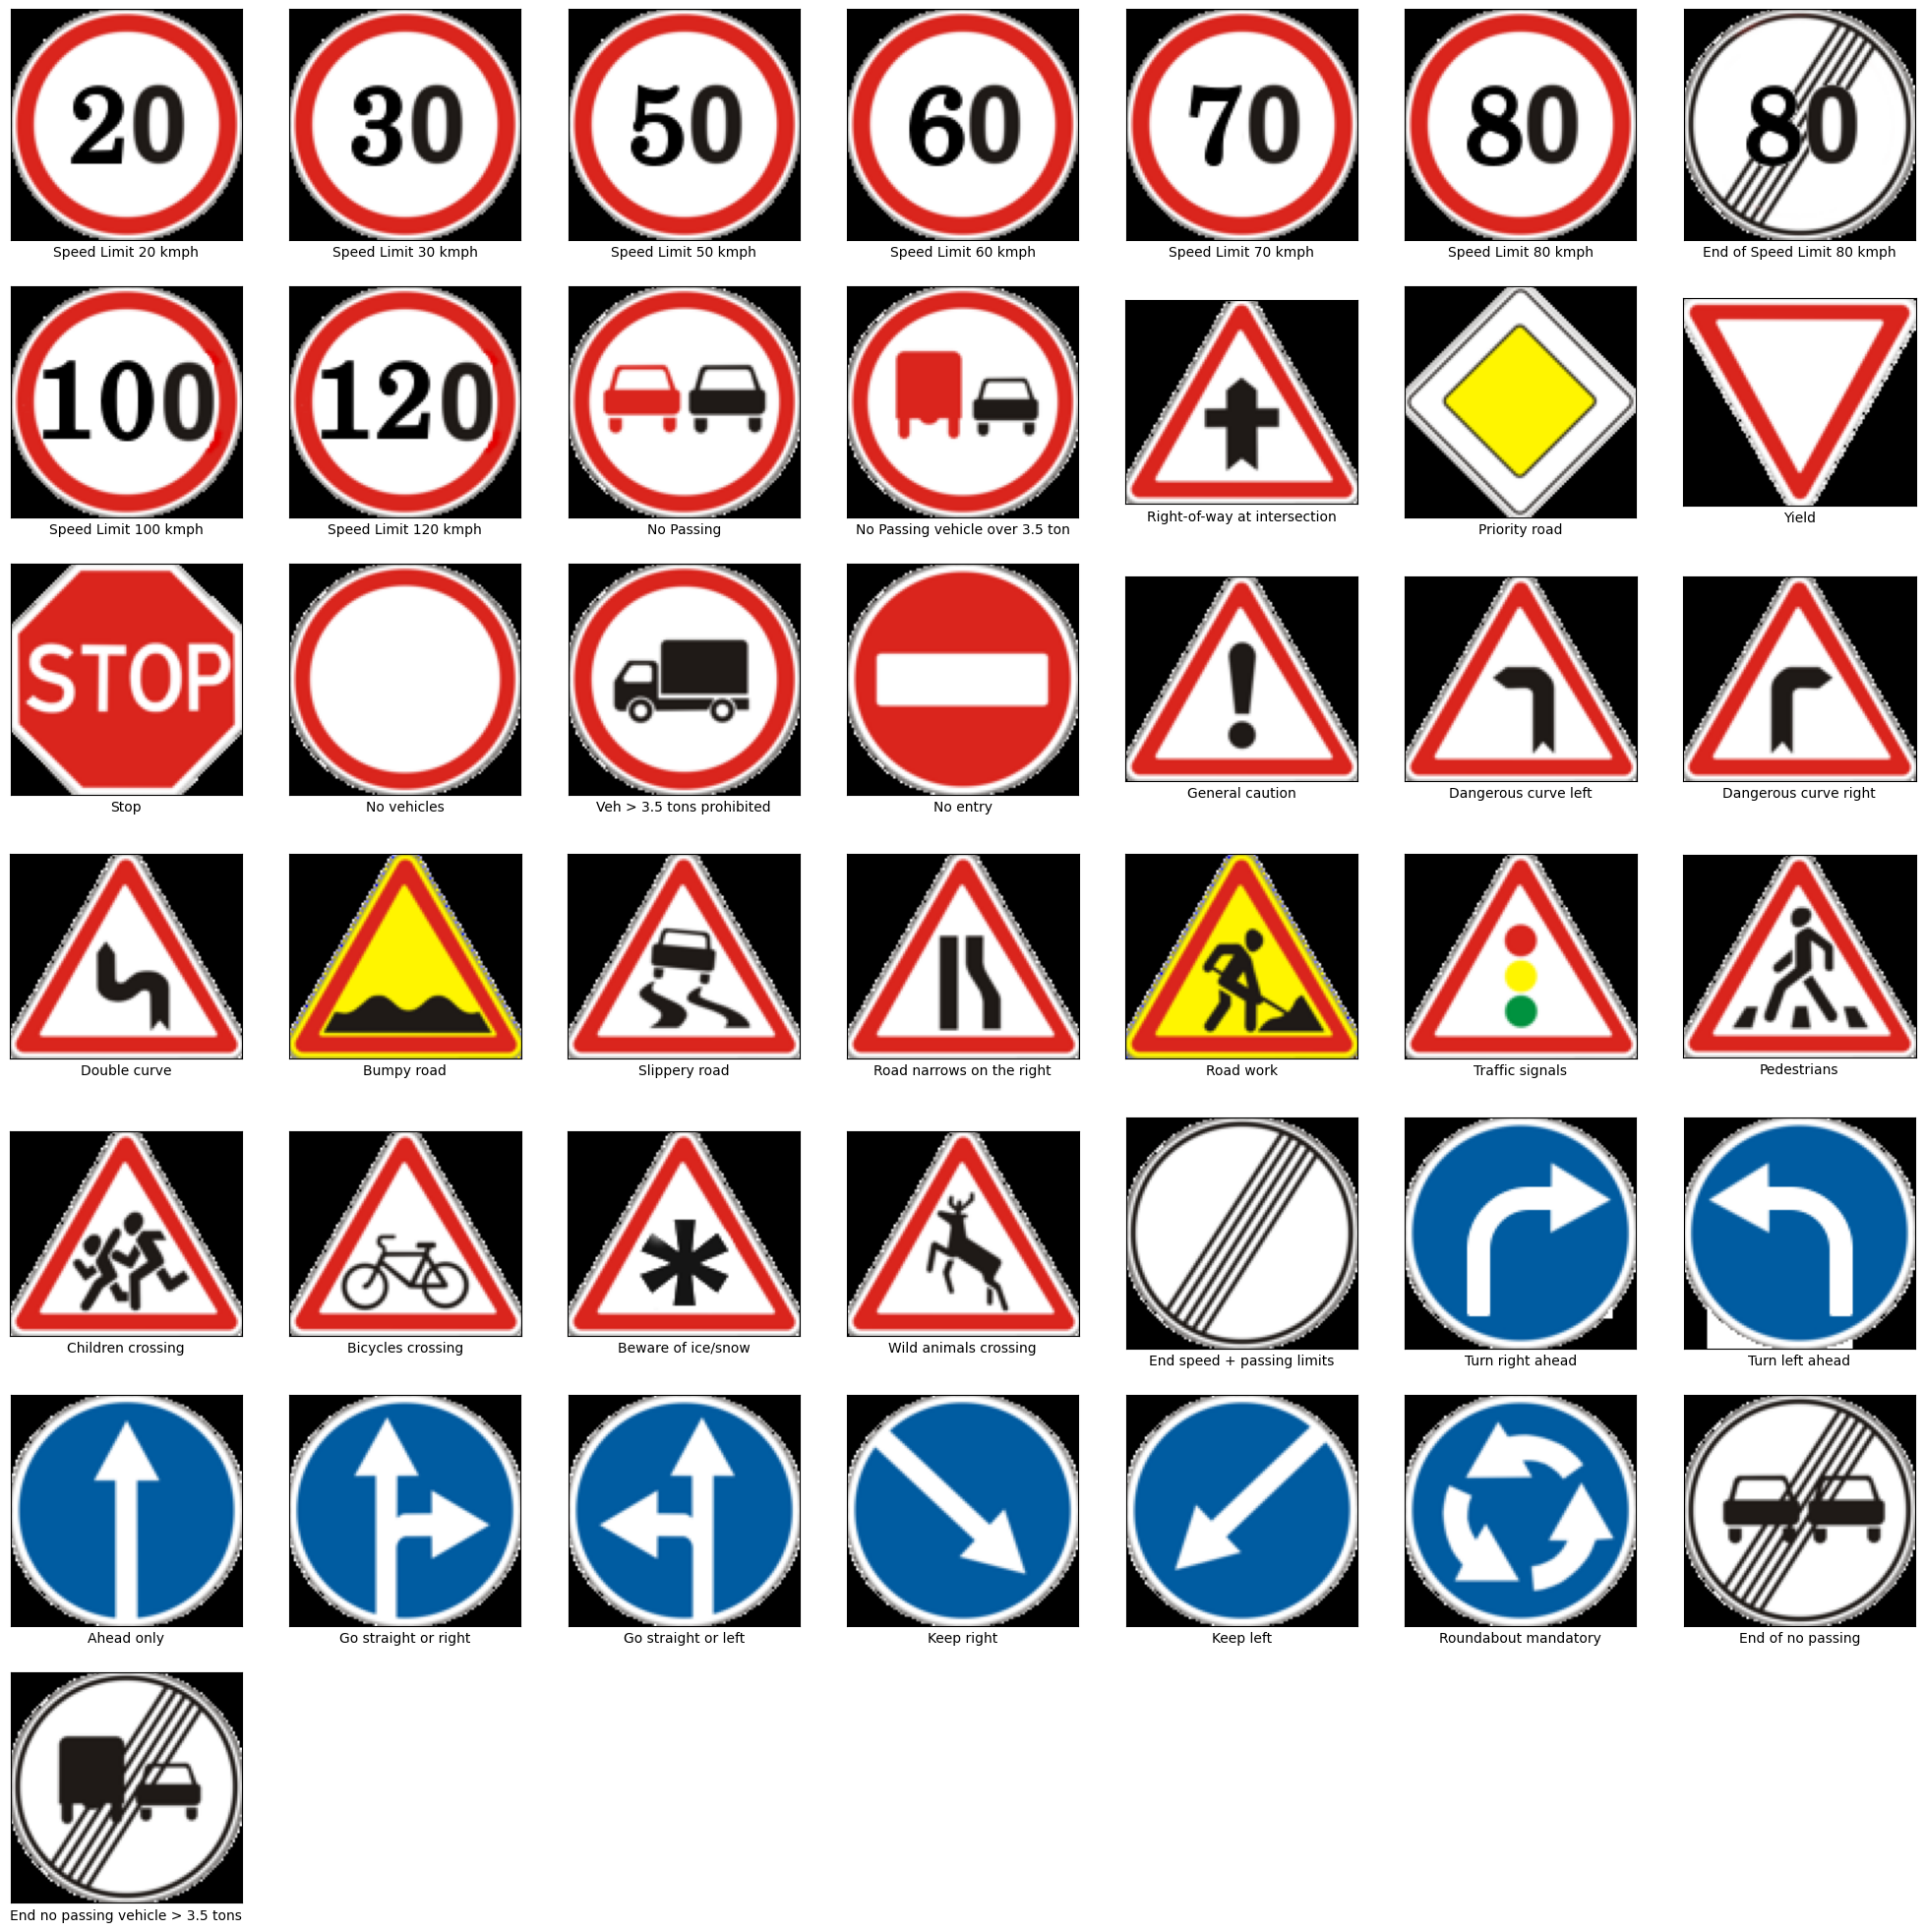

In [ ]:
sortFunction = lambda x: int(os.path.basename(x)[:-4])
plt.figure(figsize = (25, 25))
for i, imagename in enumerate(sorted(glob.glob(data_path + 'Meta/' + '*.*'), key = sortFunction)):
    plt.subplot(7, 7, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_dict[i])
    image = cv2.imread(imagename)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

### VISUALIZING ALL THE COLORS OF THE SIGNS

In [ ]:
# Checking Value counts for ShapeId
shape_dict = {0: 'Triangle', 1: 'Circle', 2: 'Diamond', 3: 'Hexagon', 4: 'Inverse Triangle'}

shape_counts = df_meta.ShapeId.value_counts().sort_index()

for shape_id, count in shape_counts.items():
    shape_name = shape_dict[int(shape_id)]
    print(f"{int(shape_id)}: {shape_name} -> {int(count)}")

0: Triangle -> 15
1: Circle -> 25
2: Diamond -> 1
3: Hexagon -> 1
4: Inverse Triangle -> 1


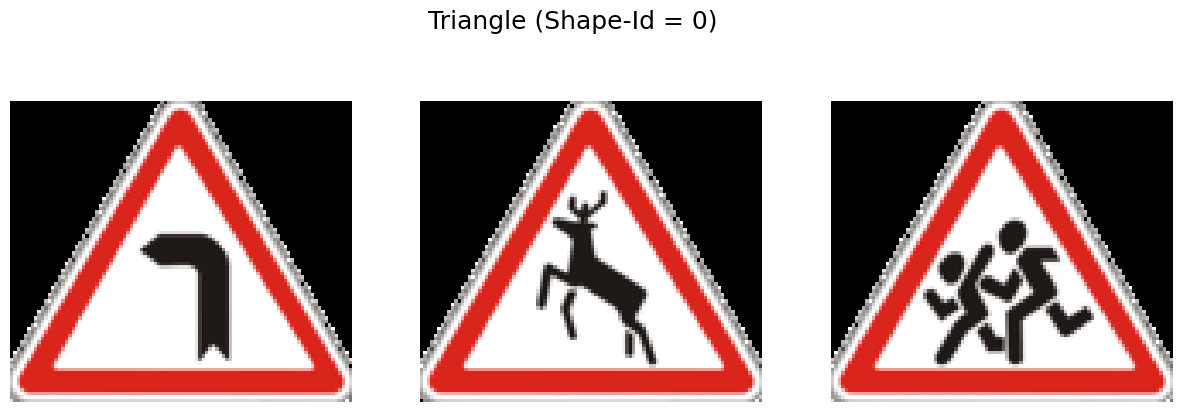

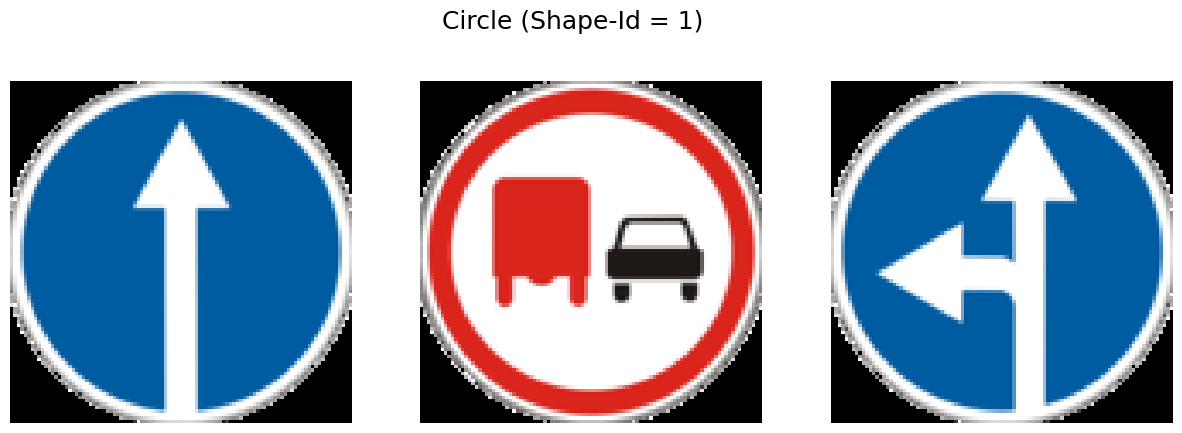

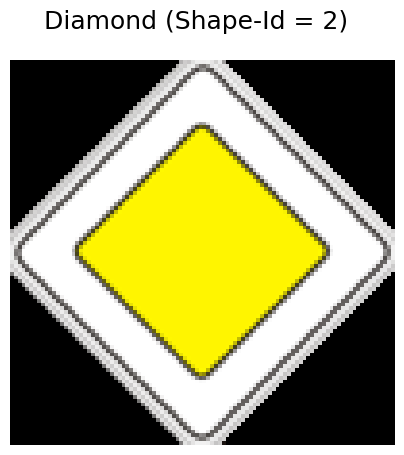

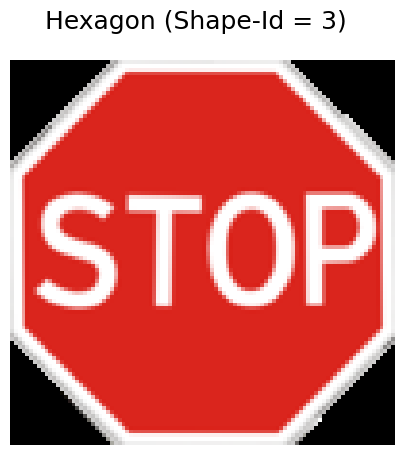

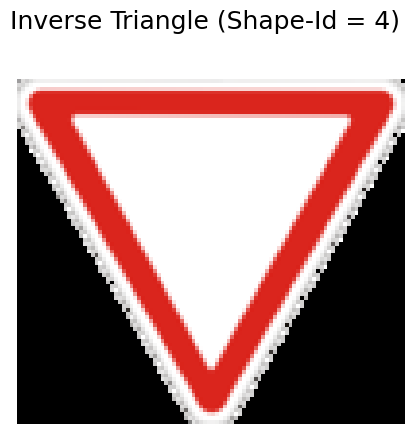

<Figure size 0x500 with 0 Axes>

In [ ]:
def visualize_shape(shape_id, n_images=1):
    subset = df_meta[df_meta.ShapeId == shape_id]
    filenames = subset.sample(min(n_images, len(subset))).Path.values

    images = [cv2.imread(os.path.join(data_path, filename)) for filename in filenames]

    plt.figure(figsize=(5 * len(images), 5))
    plt.suptitle(f"{shape_dict.get(shape_id, 'Unknown')} (Shape-Id = {shape_id})", fontsize=18)

    for i, img in enumerate(images):
        plt.subplot(1, len(images), i + 1)
        plt.axis('off')
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

for shape_id in range(6):
    visualize_shape(shape_id, n_images=3 if shape_id in [0, 1] else 1)

In [ ]:
# Checking Value counts for ColorId
color_dict = {0: 'Red', 1: 'Blue', 2: 'Yellow', 3: 'White'}
color_counts = df_meta.ColorId.value_counts().sort_index()

for color_id, count in color_counts.items():
    color_name = color_dict[int(color_id)]
    print(f"{int(color_id)}: {color_name} -> {int(count)}")

0: Red -> 30
1: Blue -> 8
2: Yellow -> 1
3: White -> 4


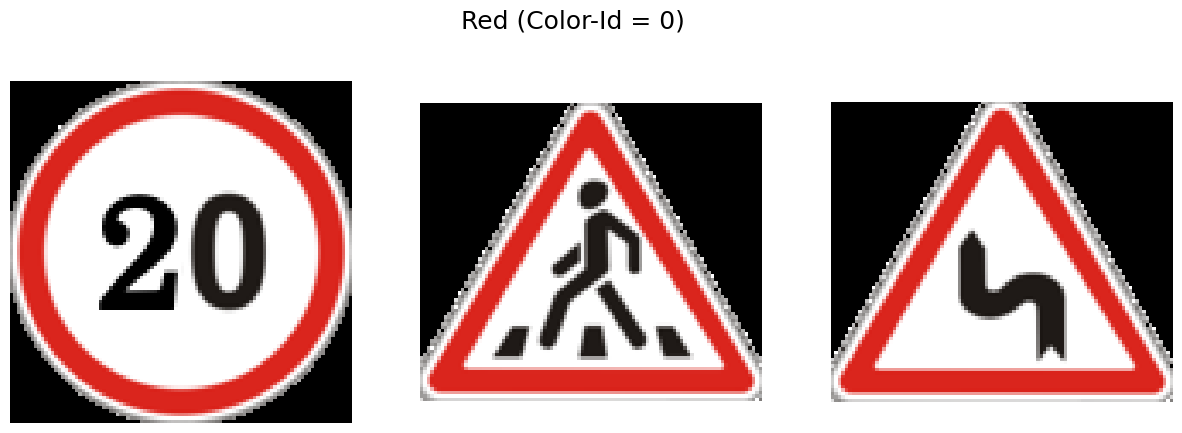

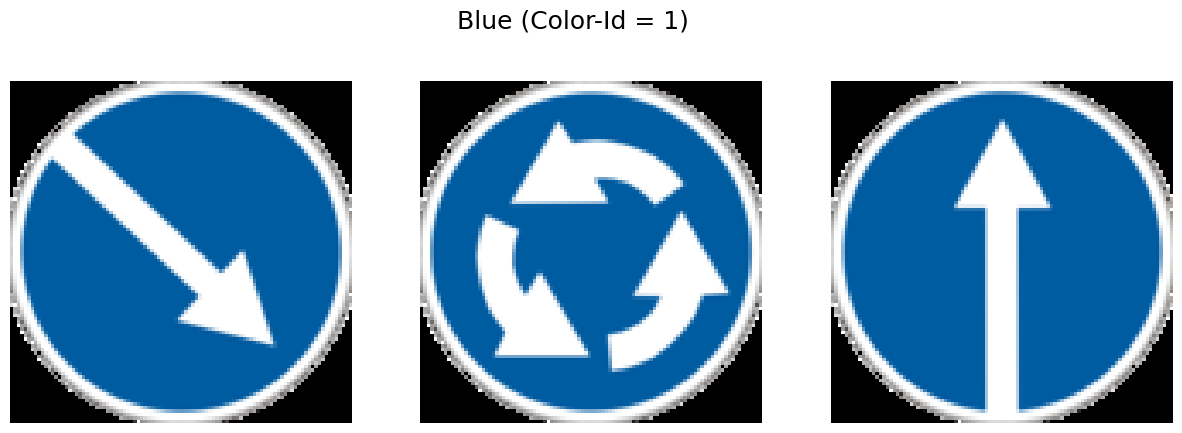

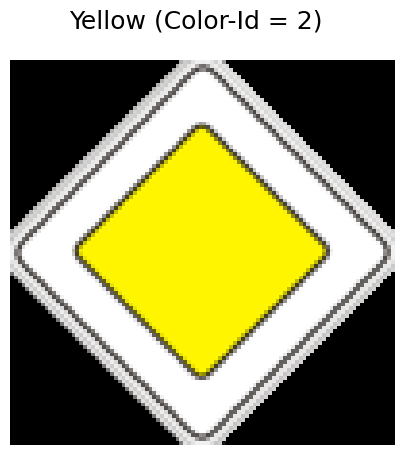

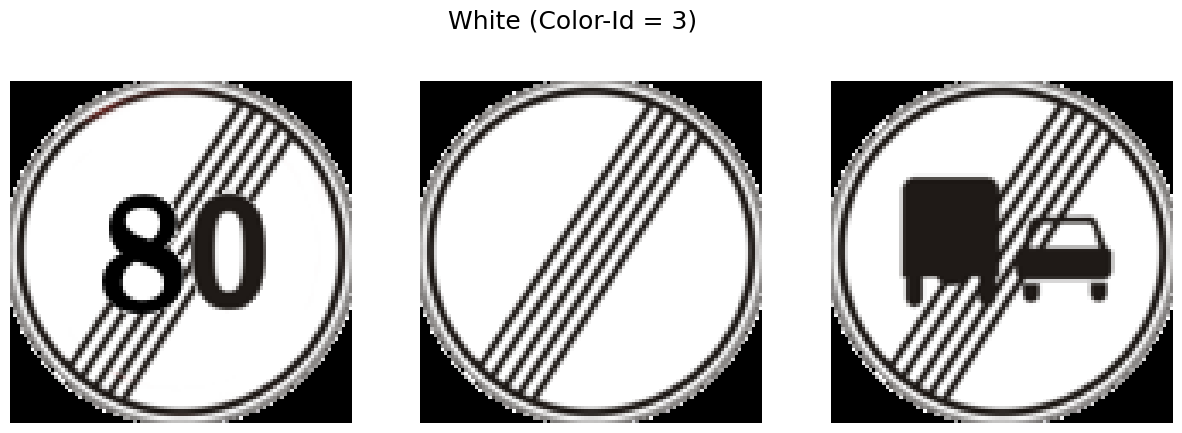

In [ ]:
def visualize_color(color_id, n_images=1):
    subset = df_meta[df_meta.ColorId == color_id]
    filenames = subset.sample(min(n_images, len(subset))).Path.values

    images = [cv2.imread(os.path.join(data_path, filename)) for filename in filenames]

    plt.figure(figsize=(5 * len(images), 5))
    plt.suptitle(f"{color_dict.get(color_id, 'Unknown')} (Color-Id = {color_id})", fontsize=18)

    for i, img in enumerate(images):
        plt.subplot(1, len(images), i + 1)
        plt.axis('off')
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

for color_id in range(4):
    visualize_color(color_id, n_images=3 if color_id in [0, 1,3] else 1)

### VISUALIZING CLASS DISTRIBUTION FOR TRAINING DATA

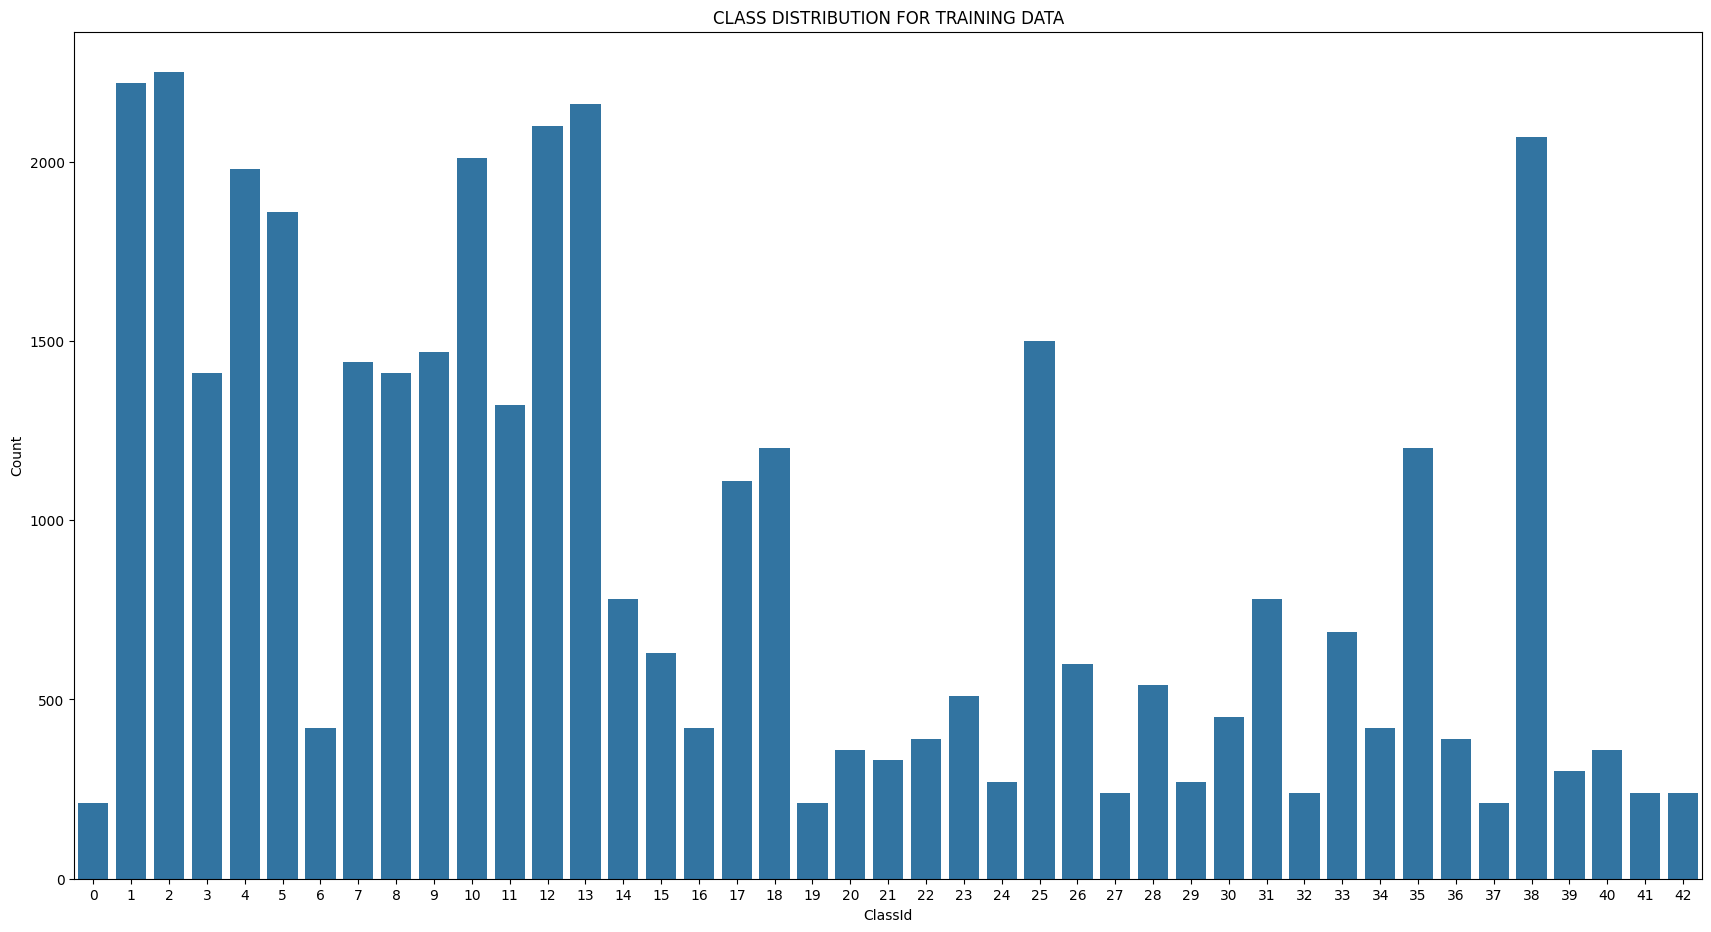

In [ ]:
plt.figure(figsize=(21, 11))
sns.countplot(x='ClassId', data=df_train)
plt.title('CLASS DISTRIBUTION FOR TRAINING DATA')
plt.xlabel('ClassId')
plt.ylabel('Count')
plt.show()

In [ ]:
df_balance = pd.DataFrame()
df_balance['labels'] = list(range(43))
df_balance['train'] = train_dict.values()
df_balance['test'] = test_dict.values()
df_balance['total'] = df_balance['train'] + df_balance['test']
df_balance['train_ratio'] = df_balance['train']/df_balance['total']
df_balance['test_ratio'] = df_balance['test']/df_balance['total']

In [ ]:
df_balance.head(10)

,labels,train,test,total,train_ratio,test_ratio
0,0,210,60,270,0.777778,0.222222
1,1,2220,720,2940,0.755102,0.244898
2,2,2250,750,3000,0.750000,0.250000
3,3,1410,450,1860,0.758065,0.241935
4,4,1980,660,2640,0.750000,0.250000
5,5,1860,630,2490,0.746988,0.253012
6,6,420,150,570,0.736842,0.263158
7,7,1440,450,1890,0.761905,0.238095
8,8,1410,450,1860,0.758065,0.241935
9,9,1470,480,1950,0.753846,0.246154


### VISUALIZING CLASS DISTRIBUTION OF THE TRAINING DATA

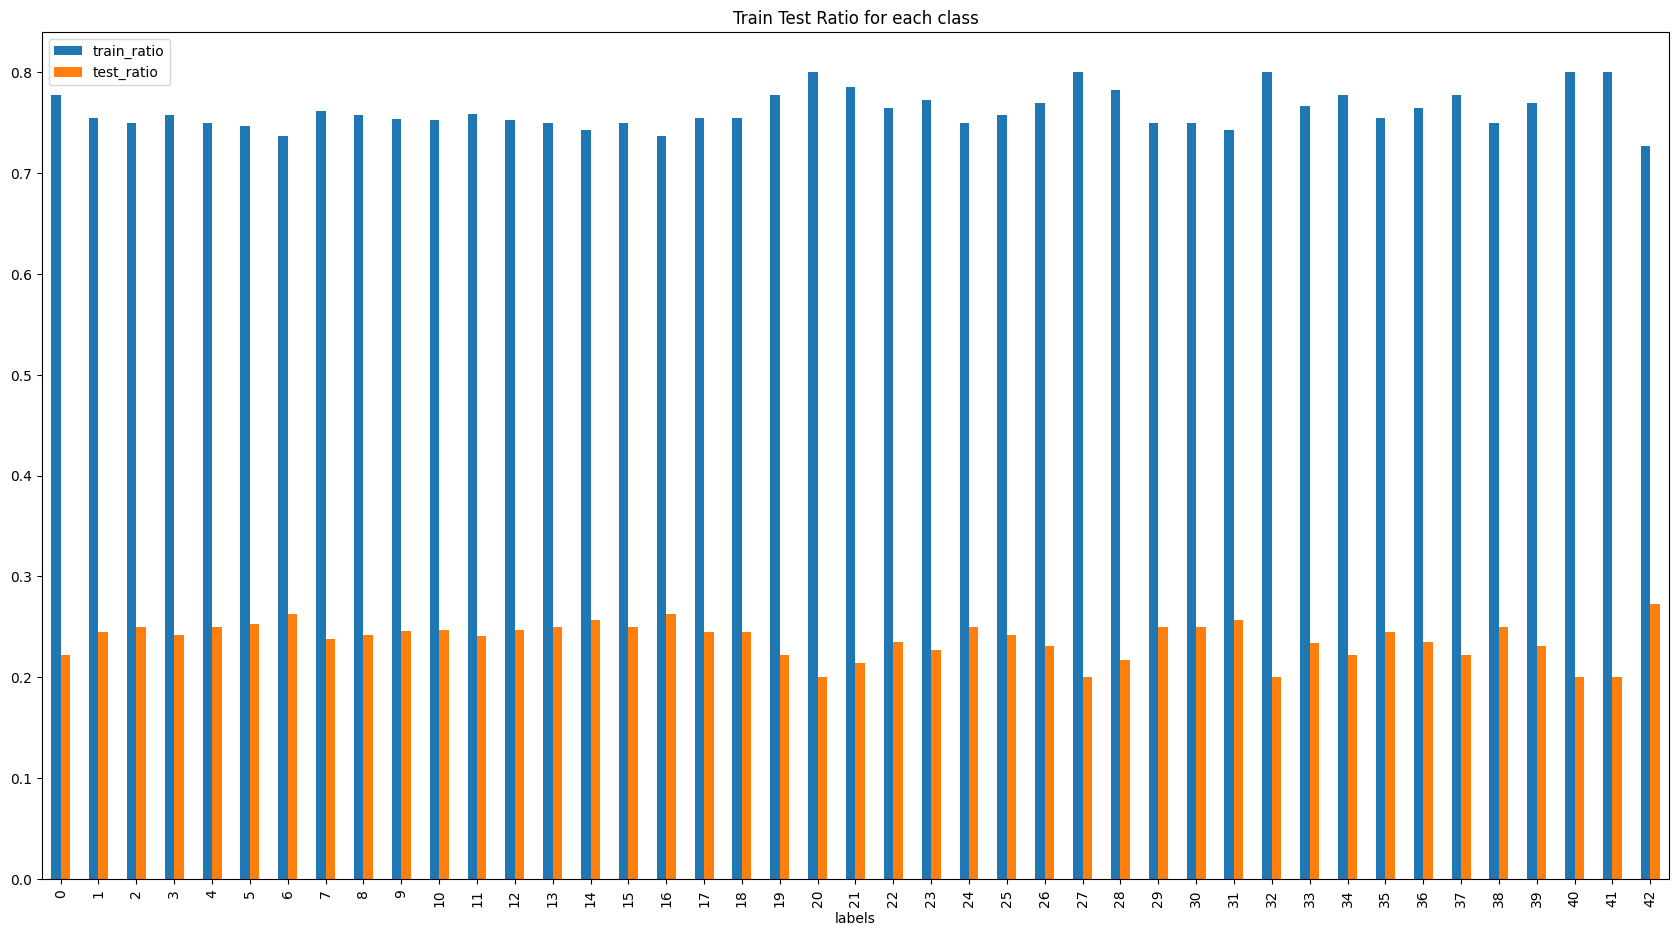

In [ ]:
df_balance.plot(x = 'labels', y = ['train_ratio', 'test_ratio'], kind = 'bar', figsize = (21, 11), title = "Train Test Ratio for each class")
plt.show()

# DATA PREPROCESSING

### ADDING COLOR AND SHAPE TO THE TRAINING DATA

In [ ]:
# Merging df_train with df_meta on 'ClassId' to get 'ColorId' and 'ShapeId' in df_train
df_train = df_train.merge(df_meta[['ClassId', 'ColorId']], on='ClassId', how='left')
df_train = df_train.merge(df_meta[['ClassId', 'ShapeId']], on='ClassId', how='left')

# Visualizing random samples
df_train.sample(5)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path,ColorId,ShapeId
16033,34,34,6,6,29,29,10,Train/10/00010_00033_00013.png,0,1
34844,36,38,5,6,31,33,35,Train/35/00035_00021_00015.png,1,1
4599,58,60,5,6,53,55,2,Train/2/00002_00060_00009.png,0,1
37610,39,41,5,5,34,36,38,Train/38/00038_00053_00021.png,1,1
31287,93,82,9,8,85,75,28,Train/28/00028_00015_00027.png,0,0


### ADDING COLOR AND SHAPE TO THE TESTING DATA

In [ ]:

# Merging df_test with df_meta on 'ClassId' to get 'ColorId' and 'ShapeId' in df_test
df_test = df_test.merge(df_meta[['ClassId', 'ColorId']], on='ClassId', how='left')
df_test = df_test.merge(df_meta[['ClassId', 'ShapeId']], on='ClassId', how='left')

# Visualizing random samples
df_test.sample(5)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path,ColorId,ShapeId
4373,49,46,5,5,44,41,8,Test/04373.png,0,1
9320,36,35,6,5,31,30,1,Test/09320.png,0,1
2589,46,43,6,6,41,38,26,Test/02589.png,0,0
12022,36,36,5,6,31,31,8,Test/12022.png,0,1
8112,29,29,6,6,24,24,17,Test/08112.png,0,1


### LOADING AND PREPROCESSING TRAINING DATA

#### RESIZING THE DATA INTO UNIFORM SHAPES

In [ ]:
train_data = []
train_labels = []
train_folders = os.listdir(train_path)
for folders in tqdm.tqdm(train_folders):
    imagefiles = os.listdir(train_path + folders)
    for imagefile in imagefiles:
        path = os.path.join(train_path, folders, imagefile)
        image = Image.open(path)
        image = image.resize((32, 32))
        image = np.array(image)
        train_data.append(image)
        train_labels.append(int(folders))

100%|██████████| 43/43 [16:40<00:00, 23.28s/it]


#### NORMALIZING THE DATA

In [ ]:
train_data = np.array(train_data) / 255.
train_labels = np.array(train_labels)

In [ ]:
len(df_train), len(train_data), len(train_labels)

(39209, 39249, 39249)

In [ ]:

print("There are {} images in train dataset".format(len(train_data)))
print("Each image has a dimension of : {}".format(train_data[0].shape))

There are 39249 images in train dataset
Each image has a dimension of : (32, 32, 3)


### LOADING AND PREPROCESSING TESTING DATA

#### RESIZING THE DATA INTO UNIFORM SHAPES

In [ ]:
test_data = []
test_labels = df_test.ClassId.tolist()
test_filenames = (data_path + df_test.Path).tolist()

for test_filename in tqdm.tqdm(test_filenames):
    # cv2.imread reads as BGR by default
    image = cv2.imread(test_filename)
    # Resize to 32x32
    image = cv2.resize(image, (32, 32))
    # Convert BGR to RGB (if your model expects RGB)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    test_data.append(image)

100%|██████████| 12630/12630 [1:07:00<00:00,  3.14it/s]


#### NORMALIZING THE DATA

In [ ]:
X_test = np.array(test_data) / 255.
y_test = np.array(test_labels)

#### ONE-HOT ENCODING

In [ ]:
y_test= to_categorical(y_test)
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
len(df_test), len(X_test), len(test_labels)

(12630, 12630, 12630)

In [ ]:
print("There are {} images in test dataset".format(len(X_test)))
print("Each image has a dimension of : {}".format(X_test[0].shape))

There are 12630 images in test dataset
Each image has a dimension of : (32, 32, 3)


# DATA SPLITTING

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(train_data, train_labels, test_size = 0.25, stratify = train_labels, random_state = 42)
train_unique, y_train_count = np.unique(y_train, return_counts = True)
val_unique, y_val_count = np.unique(y_val, return_counts = True)
y_train, y_val = to_categorical(y_train, num_classes), to_categorical(y_val, num_classes)
print("X_train : {}".format(X_train.shape))
print("y_train : {}".format(y_train.shape))
print("X_val   : {}".format(X_val.shape))
print("y_val   : {}".format(y_val.shape))

X_train : (29436, 32, 32, 3)
y_train : (29436, 43)
X_val   : (9813, 32, 32, 3)
y_val   : (9813, 43)


# MODEL CREATION

In [ ]:

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,939 (1.36 MB)

 Trainable params: 356,939 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

# MODEL COMPILATION AND FITTING

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=32, epochs=12, validation_data=(X_val, y_val), verbose = True)

Epoch 1/12
920/920 ━━━━━━━━━━━━━━━━━━━━ 160s 171ms/step - accuracy: 0.4038 - loss: 2.2082 - val_accuracy: 0.9689 - val_loss: 0.1101
Epoch 2/12
920/920 ━━━━━━━━━━━━━━━━━━━━ 211s 181ms/step - accuracy: 0.9348 - loss: 0.2111 - val_accuracy: 0.9854 - val_loss: 0.0497
Epoch 3/12
920/920 ━━━━━━━━━━━━━━━━━━━━ 203s 182ms/step - accuracy: 0.9628 - loss: 0.1269 - val_accuracy: 0.9911 - val_loss: 0.0324
Epoch 4/12
920/920 ━━━━━━━━━━━━━━━━━━━━ 192s 172ms/step - accuracy: 0.9739 - loss: 0.0878 - val_accuracy: 0.9928 - val_loss: 0.0296
Epoch 5/12
920/920 ━━━━━━━━━━━━━━━━━━━━ 159s 173ms/step - accuracy: 0.9791 - loss: 0.0772 - val_accuracy: 0.9914 - val_loss: 0.0360
Epoch 6/12
920/920 ━━━━━━━━━━━━━━━━━━━━ 159s 173ms/step - accuracy: 0.9787 - loss: 0.0715 - val_accuracy: 0.9928 - val_loss: 0.0267
Epoch 7/12
920/920 ━━━━━━━━━━━━━━━━━━━━ 201s 173ms/step - accuracy: 0.9818 - loss: 0.0564 - val_accuracy: 0.9953 - val_loss: 0.0178
Epoch 8/12
920/920 ━━━━━━━━━━━━━━━━━━━━ 210s 181ms/step - accuracy: 0.9828 -

# VISUALIZING PLOTS

### ACCURACY PLOT

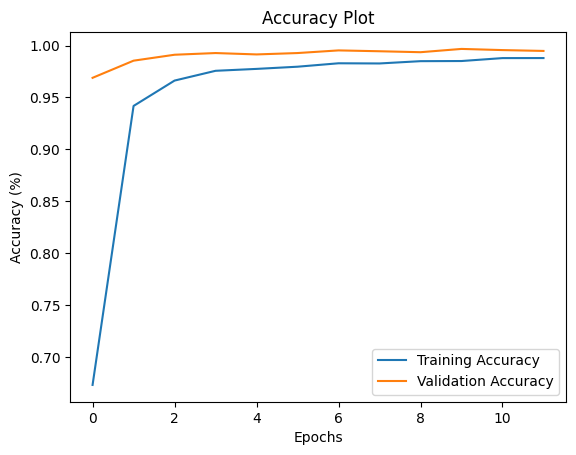

In [ ]:
plt.figure()
plt.plot(history.history['accuracy'], label = "Training Accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation Accuracy")
plt.title("Accuracy Plot")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.show()

### LOSS PLOT

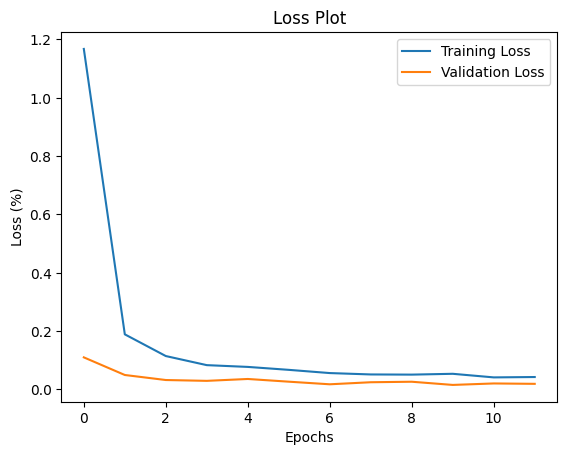

In [ ]:
plt.figure()
plt.plot(history.history['loss'], label = "Training Loss")
plt.plot(history.history['val_loss'], label = "Validation Loss")
plt.title("Loss Plot")
plt.xlabel("Epochs")
plt.ylabel("Loss (%)")
plt.legend()
plt.show()

# MODEL EVALUATION

In [ ]:
# Convert y_test back to one-hot encoded format for evaluation
if y_test.ndim == 1:
  y_test = to_categorical(y_test, num_classes)

print("Loss of the model is - " , model.evaluate(X_test,y_test)[0])
print("\n")
print("Accuracy of the model is - " , model.evaluate(X_test,y_test)[1])

395/395 ━━━━━━━━━━━━━━━━━━━━ 23s 58ms/step - accuracy: 0.9704 - loss: 0.1565
Loss of the model is -  0.1541551947593689


395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - accuracy: 0.9704 - loss: 0.1565
Accuracy of the model is -  0.9704671502113342


In [ ]:
# Get prediction probabilities for each class
predictions = model.predict(X_test)

# Convert probabilities to class labels (integers from 0 to 42)
predicted_classes = predictions.argmax(axis=1)

print(predicted_classes)

395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step
[16  1 38 ...  6  7 10]


# CONFUSION MATRIX

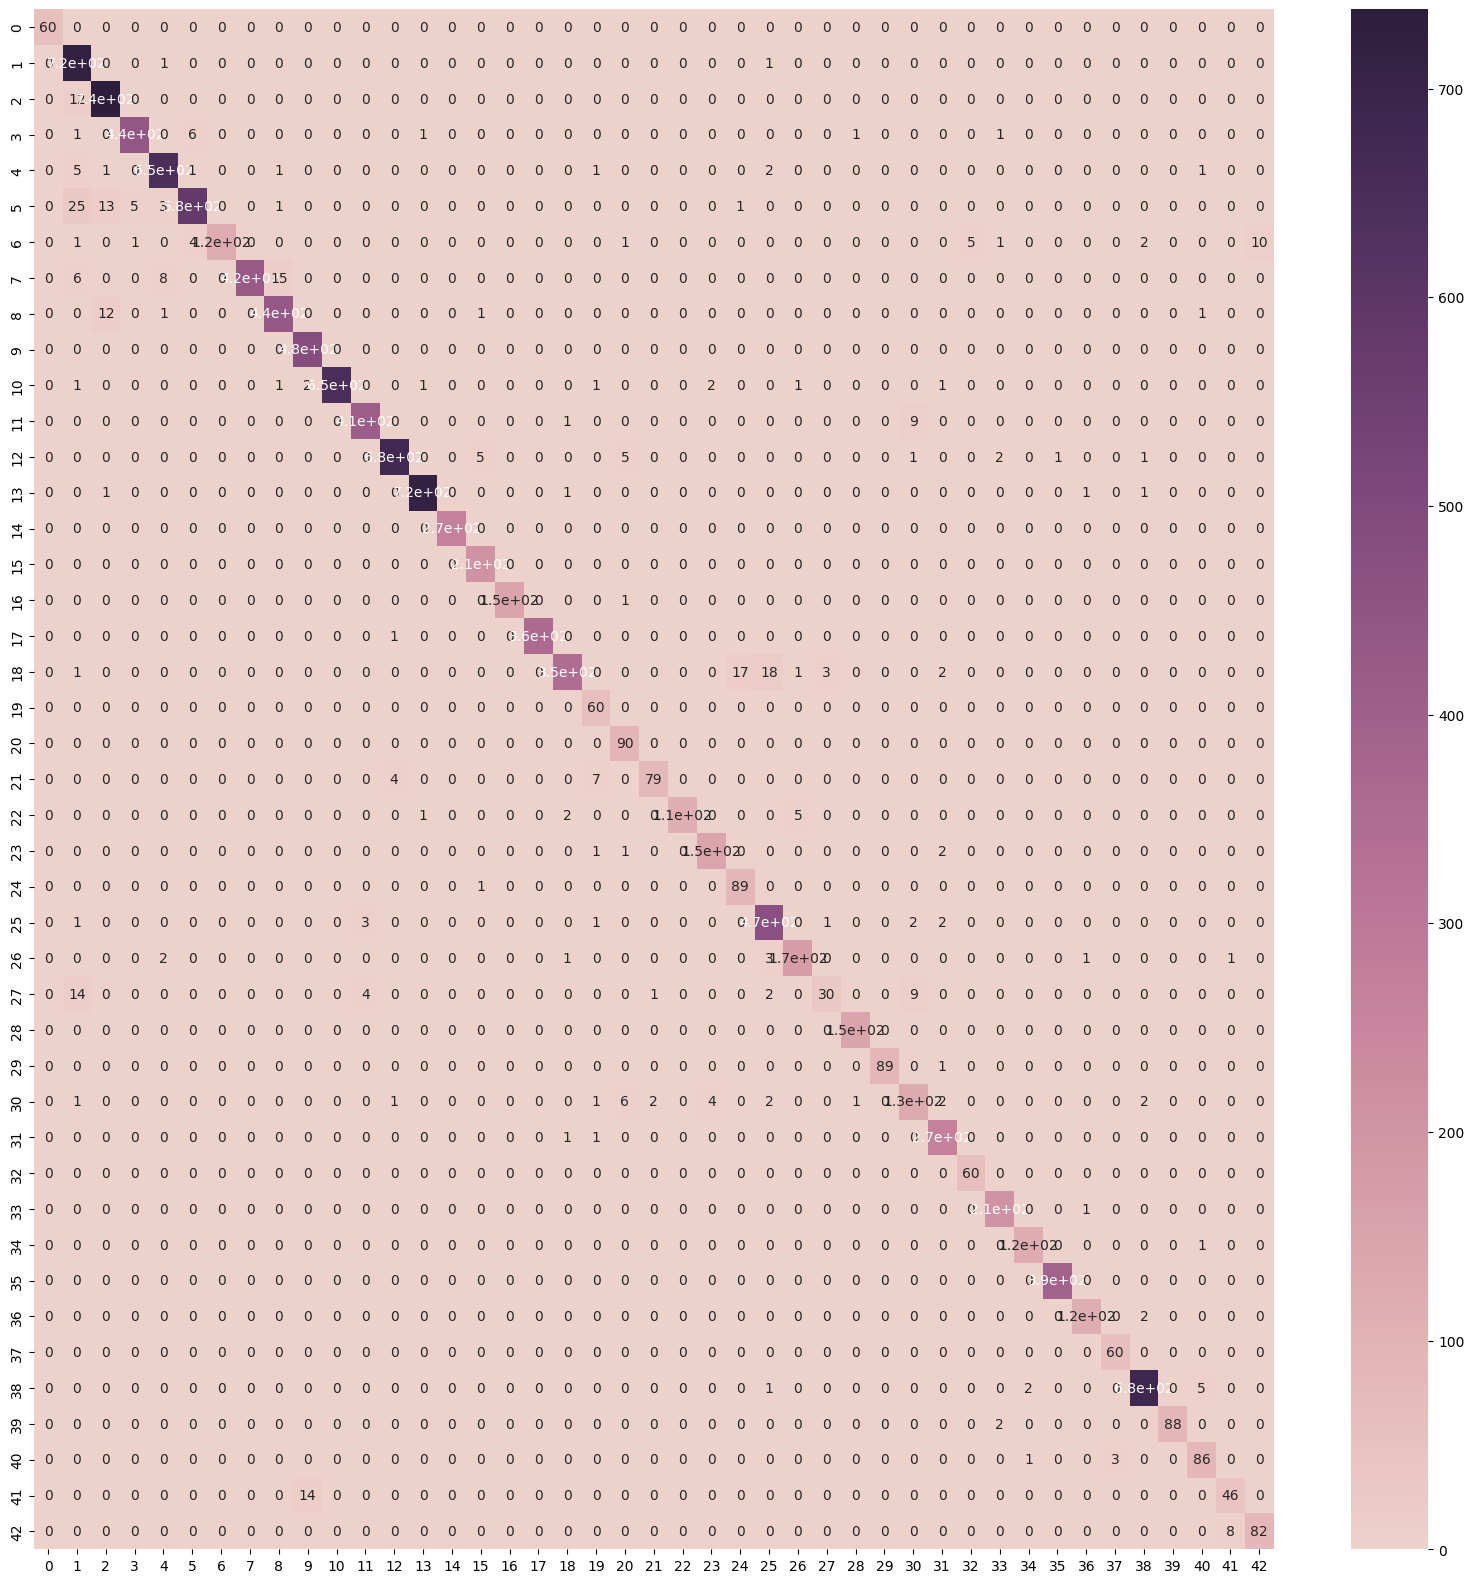

In [ ]:
# Convert y_test back to multiclass format if it's one-hot encoded
if y_test.ndim > 1:
    y_test = y_test.argmax(axis=1)

cm = confusion_matrix(y_test, predicted_classes)

df_cm = pd.DataFrame(cm, index = [i for i in range(num_classes)], columns = [i for i in range(num_classes)])
plt.figure(figsize = (20, 20))
sns.heatmap(df_cm, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

## CLASSIFICATION REPORT

In [ ]:
if y_test.ndim > 1:
    y_test = y_test.argmax(axis=1)

print("Classification Report:\n")
print(classification_report(y_test, predicted_classes, digits=4))

Classification Report:

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        60
           1     0.9135    0.9972    0.9535       720
           2     0.9647    0.9840    0.9743       750
           3     0.9865    0.9778    0.9821       450
           4     0.9774    0.9818    0.9796       660
           5     0.9815    0.9238    0.9518       630
           6     1.0000    0.8333    0.9091       150
           7     1.0000    0.9356    0.9667       450
           8     0.9603    0.9667    0.9635       450
           9     0.9677    1.0000    0.9836       480
          10     1.0000    0.9848    0.9924       660
          11     0.9832    0.9762    0.9797       420
          12     0.9912    0.9783    0.9847       690
          13     0.9958    0.9944    0.9951       720
          14     1.0000    1.0000    1.0000       270
          15     0.9677    1.0000    0.9836       210
          16     1.0000    0.9933    0.9967       150
   

# TEST-IMAGE PREDICTIONS (GREEN:CORRECT, RED:INCORRECT)

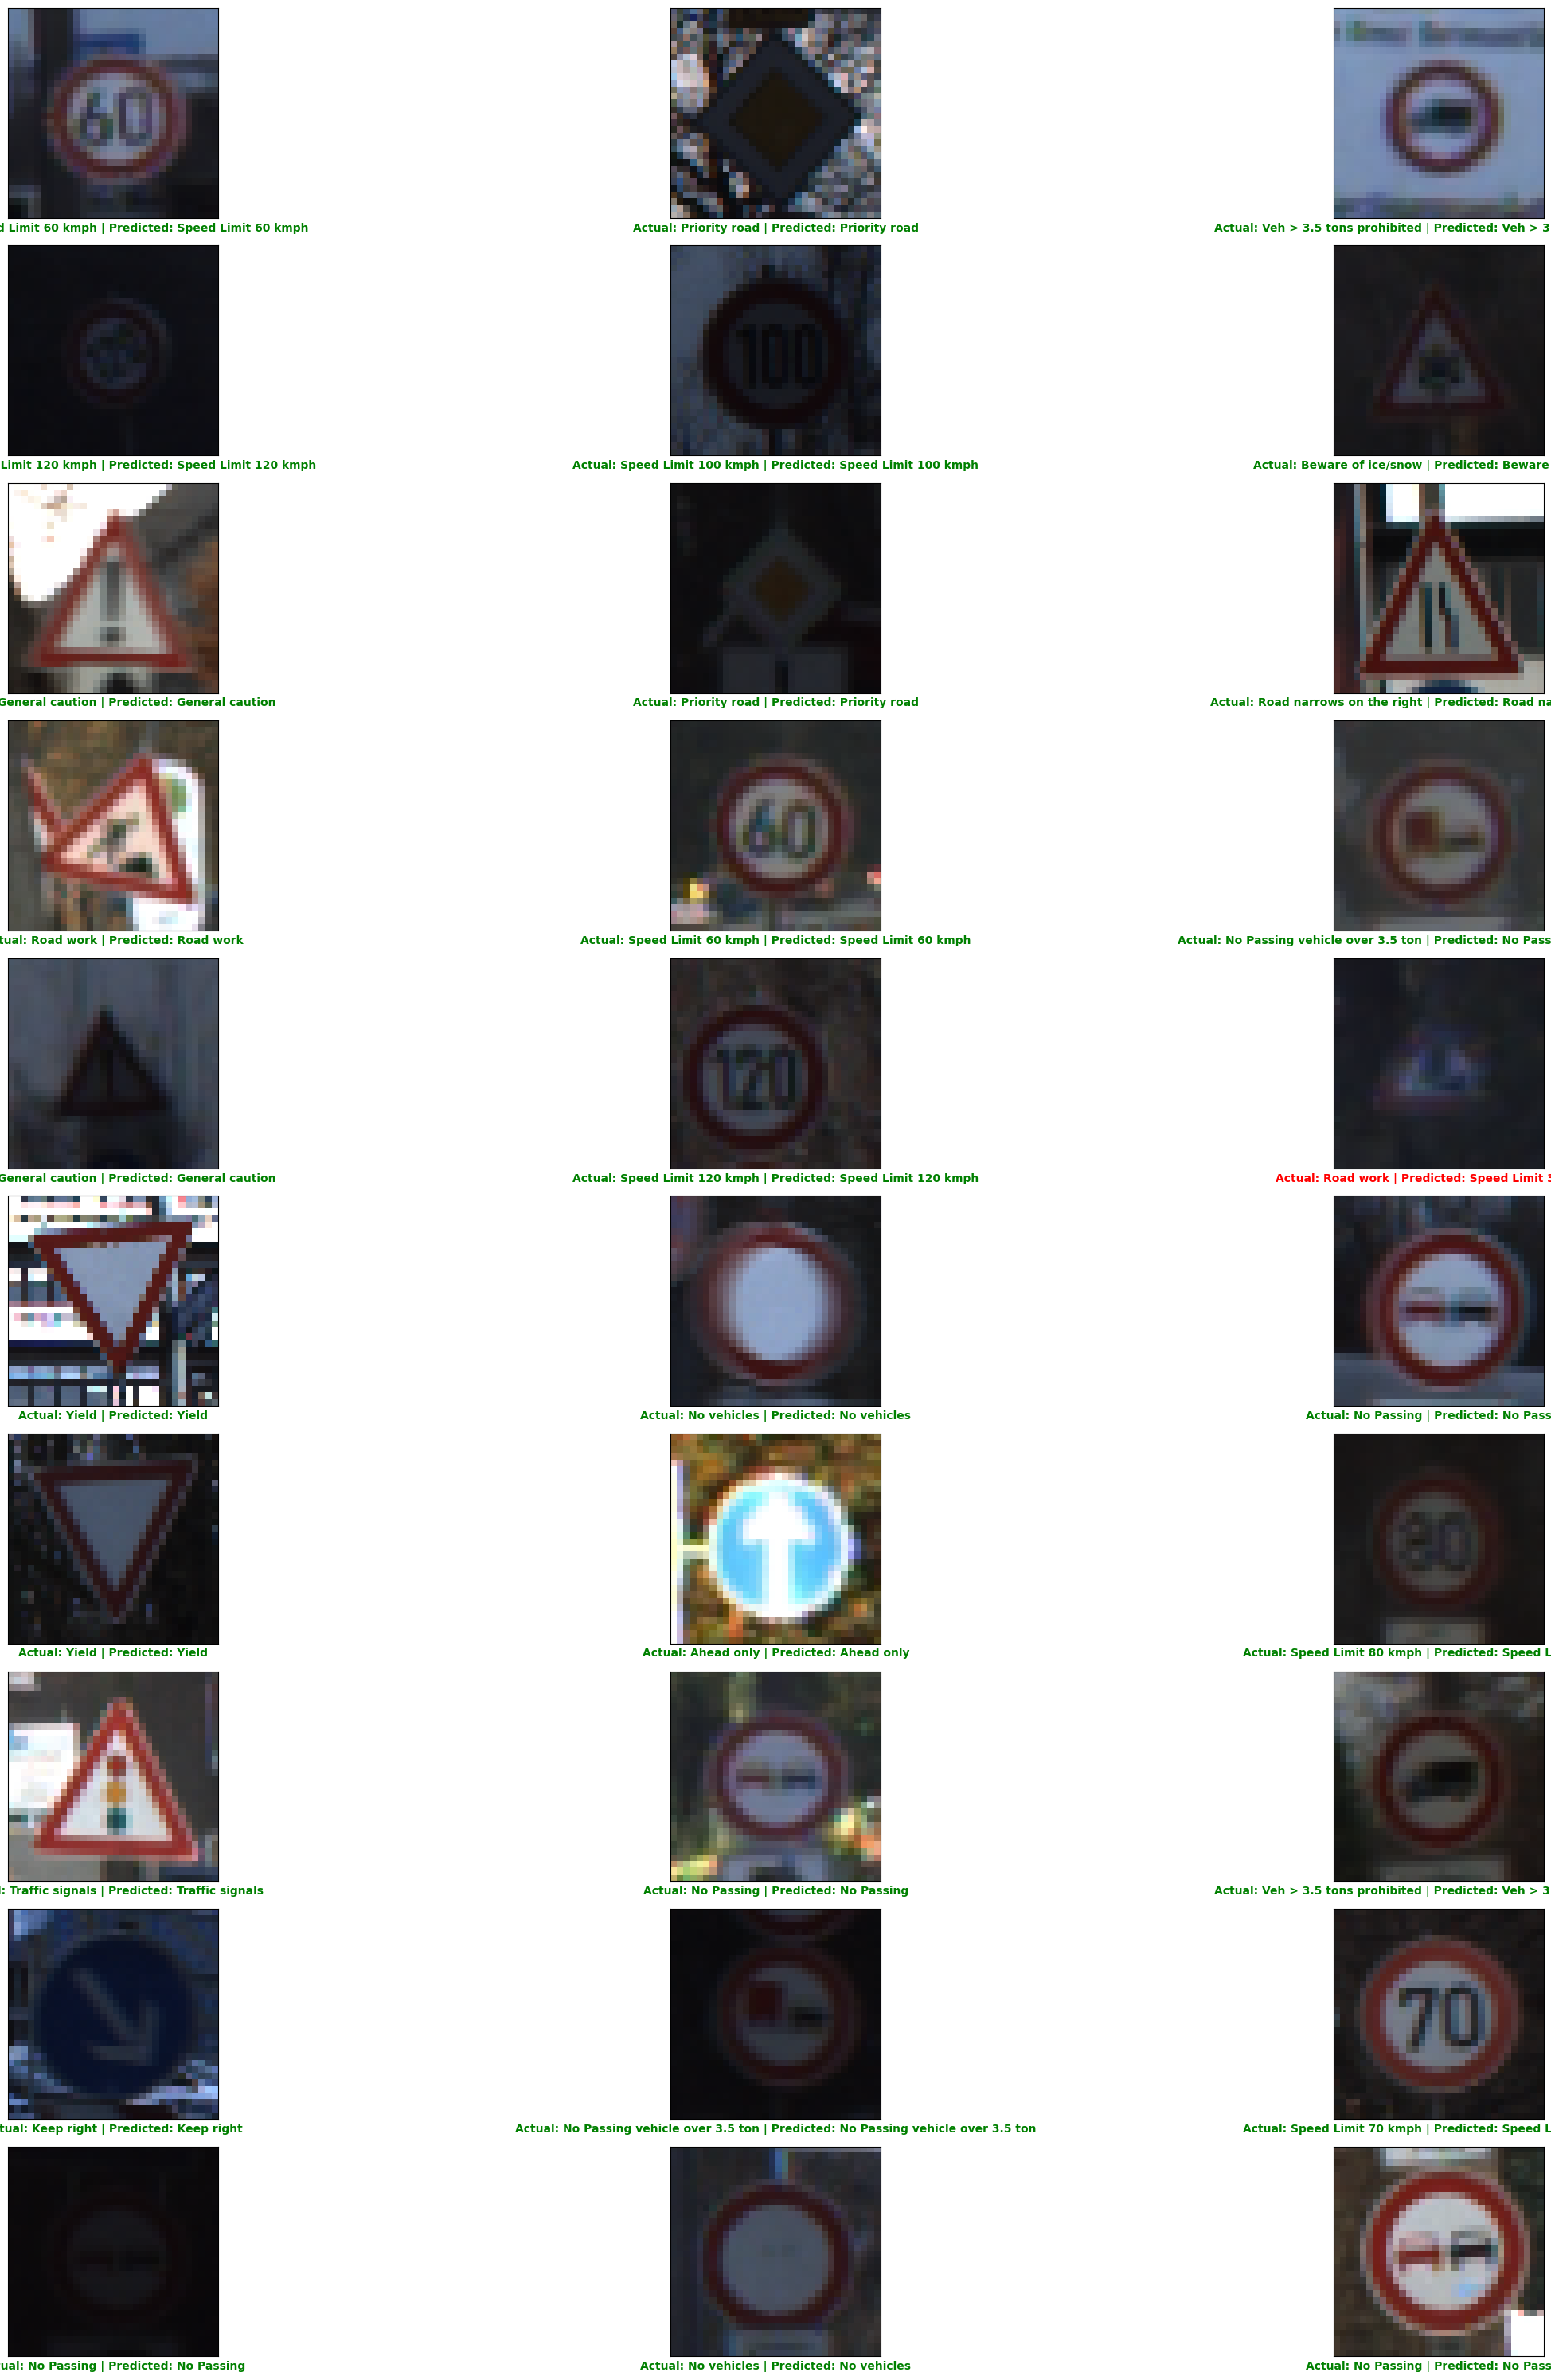

In [ ]:
if y_test.ndim > 1:
    y_test = y_test.argmax(axis=1)

plt.figure(figsize=(30, 30))
start_index = 36

for i in range(30):
    plt.subplot(10, 3, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    index = start_index + i
    prediction = predicted_classes[index]
    ground_truth = y_test[index]


    col = 'g' if prediction == ground_truth else 'r'

    plt.xlabel(
        'Actual: {} | Predicted: {}'.format(
            class_dict.get(ground_truth, ground_truth),
            class_dict.get(prediction, prediction)
        ),
        color=col,
        weight='bold'
    )

    plt.imshow(X_test[index])

plt.tight_layout()
plt.show()

# CONCLUTION



*   The developed Convolutional Neural Network (CNN) for traffic sign detection demonstrated excellent performance, achieving a test accuracy of 97.2% and a low validation loss of 0.13, reflecting its strong ability to learn features and generalize effectively across 43 traffic sign classes.

*   These outcomes emphasize the model’s effectiveness in accurately recognizing and distinguishing traffic signs, which plays a vital role in autonomous driving and advanced driver-assistance systems (ADAS).

*   For further enhancement, future work could involve exploring deeper network architectures, fine-tuning hyperparameters, applying more sophisticated data augmentation strategies, and leveraging transfer learning with pre-trained models such as VGG16, ResNet50, or MobileNet to boost accuracy and robustness.


# CHALLENGES FACED

*   High number of classes(43)
*   Took more computational time

